<a href="https://colab.research.google.com/github/kimyeseong984/-yolo-v8/blob/main/yolo_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.7MB/s]


Saving 1.jpg.jpg to 1.jpg.jpg

0: 448x640 11 persons, 1 handbag, 360.2ms
Speed: 15.3ms preprocess, 360.2ms inference, 36.7ms postprocess per image at shape (1, 3, 448, 640)

0: 640x192 1 person, 93.6ms
Speed: 1.8ms preprocess, 93.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 192)

0: 640x256 3 persons, 120.7ms
Speed: 2.8ms preprocess, 120.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)

0: 640x256 1 person, 1 fire hydrant, 108.0ms
Speed: 2.0ms preprocess, 108.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 256)

0: 640x288 (no detections), 139.9ms
Speed: 3.6ms preprocess, 139.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 288)

0: 640x224 (no detections), 105.4ms
Speed: 2.2ms preprocess, 105.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 224)

0: 640x192 (no detections), 95.2ms
Speed: 1.9ms preprocess, 95.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 192)

0: 640x224 (no detection

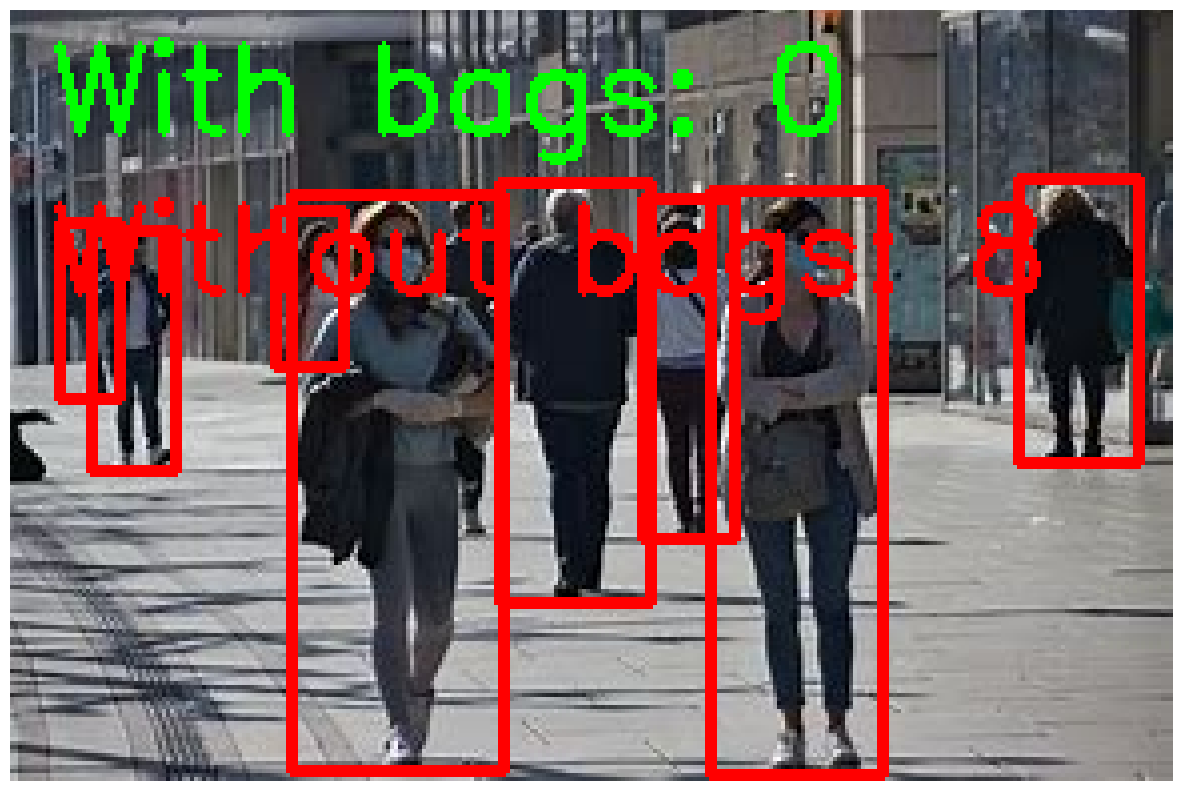


결과:
가방을 맨 사람: 0명
가방을 매지 않은 사람: 8명


In [1]:
# Install required packages
!pip install torch torchvision
!pip install ultralytics
!pip install opencv-python

import cv2
import torch
from ultralytics import YOLO
import numpy as np
from google.colab import files
from IPython.display import Image, display
import matplotlib.pyplot as plt

# Load the YOLOv5 model
model = YOLO('yolov8n.pt')

def detect_people_with_bags(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform detection
    results = model(img)

    # Initialize counters
    people_with_bags = 0
    people_without_bags = 0

    # Process detections
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Get class id and confidence
            cls = int(box.cls[0])
            conf = float(box.conf[0])

            # Class 0 is person in COCO dataset
            if cls == 0 and conf > 0.5:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # Check for bags in the person region
                person_roi = img[y1:y2, x1:x2]
                bag_results = model(person_roi)

                has_bag = False
                for bag_result in bag_results:
                    for bag_box in bag_result.boxes:
                        bag_cls = int(bag_box.cls[0])
                        # Class IDs for bags, backpacks, and handbags
                        if bag_cls in [24, 26, 28]:  # These are approximate COCO class IDs
                            has_bag = True
                            break

                # Draw bounding box
                color = (0, 255, 0) if has_bag else (255, 0, 0)
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                # Update counters
                if has_bag:
                    people_with_bags += 1
                else:
                    people_without_bags += 1

    # Add text with statistics
    cv2.putText(img, f'With bags: {people_with_bags}', (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(img, f'Without bags: {people_without_bags}', (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Convert back to BGR for display
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # Save and display result
    cv2.imwrite('result.jpg', img_bgr)
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    return people_with_bags, people_without_bags

# Upload and process image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
with_bags, without_bags = detect_people_with_bags(image_path)

print(f"\n결과:")
print(f"가방을 맨 사람: {with_bags}명")
print(f"가방을 매지 않은 사람: {without_bags}명")